# EJEMPLO

Vamos a ver un ejemplo de transformación de grados Celsius a Fahrenheit (sin poner la formula, la tendrá que calcular el modelo)

## Paso 1: Importar librerías 

In [1]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

2024-12-10 23:05:56.453097: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Paso 2: Preparación de los datos

Creamos los datos. Creamos un array de 7 temperaturas en grados Celsius y otro array con sus correspondientes temperaturas en grados Fahrenheit

In [2]:
# Crear datos simulados para transformación de Celsius a Fahrenheit
np.random.seed(42)
celsius_values = np.random.uniform(-100, 100, 1000)  # 1000 valores aleatorios entre -100 y 100
fahrenheit_values = (celsius_values * 9/5) + 32  # Convertir a Fahrenheit (sin exponer esta fórmula al modelo)

# Crear un DataFrame para organizar los datos
data = pd.DataFrame({
    "Celsius": celsius_values,
    "Fahrenheit": fahrenheit_values
})



In [3]:
data.head()


,Celsius,Fahrenheit
0,-25.091976,-13.165557
1,90.142861,194.257150
2,46.398788,115.517819
3,19.731697,67.517054
4,-68.796272,-91.833289


In [4]:

X = data["Celsius"].values.reshape(-1, 1)  # Celsius como entrada
y = data["Fahrenheit"].values.reshape(-1, 1)  # Fahrenheit como salida

## Paso 3: División de loa satos

In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Paso 4: Creación del modelo 

In [6]:
#creamos las capas de la red
input = Input(shape=(1,)) #tenemos una variable de entrada
oculta1 = Dense(3,activation='relu')  #crea una capa densamente conectada con 3 neuronas cuya función de activación es ReLU."Densamente conectada" significa que cada neurona de esta capa está conectada a todas las neuronas de la capa anterior. 
oculta2 = Dense(3, activation='relu')  
salida = Dense(1)
model = Sequential([input, oculta1, oculta2, salida])

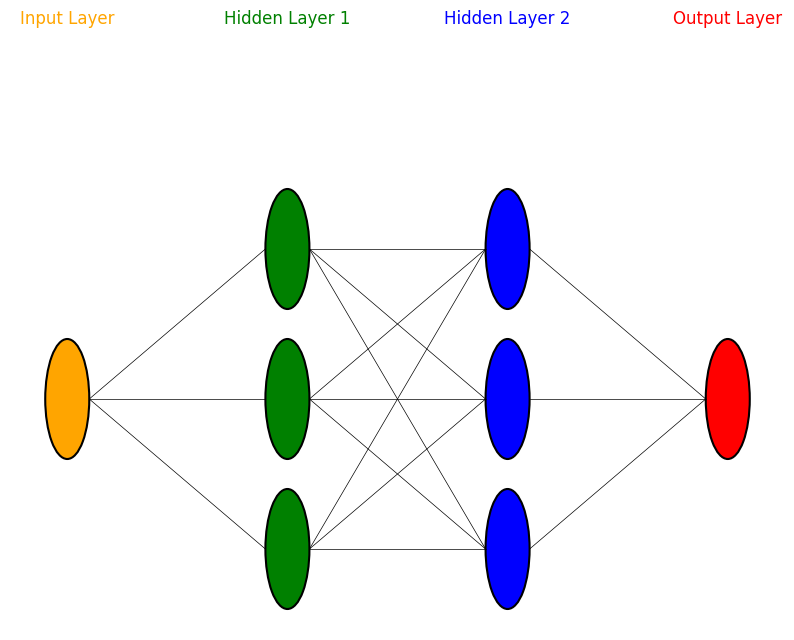

In [7]:

def draw_nn_diagram():
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis("off")

    # Capas del modelo
    layers = {
        "Input Layer": {"size": 1, "color": "orange"},  # 1 neurona en la capa de entrada
        "Hidden Layer 1": {"size": 3, "color": "green"},  # 3 neuronas en la primera capa oculta
        "Hidden Layer 2": {"size": 3, "color": "blue"},  # 3 neuronas en la segunda capa oculta
        "Output Layer": {"size": 1, "color": "red"},  # 1 neurona en la capa de salida
    }
    layer_spacing = 4  # Espaciado entre capas
    max_neurons = max([v["size"] for v in layers.values()])  # Máximo de neuronas por capa

    # Dibujar las capas y conexiones
    layer_positions = []
    for i, (name, props) in enumerate(layers.items()):
        x = i * layer_spacing
        y_start = (max_neurons - props["size"]) / 2

        layer_pos = []
        for j in range(props["size"]):
            y = max_neurons - y_start - j - 1
            circle = plt.Circle((x, y), 0.4, color=props["color"], ec="black", lw=1.5)
            ax.add_patch(circle)
            layer_pos.append((x, y))
        layer_positions.append(layer_pos)
        
        # Etiqueta de la capa
        ax.text(x, max_neurons + 0.5, name, ha="center", fontsize=12, color=props["color"])

    # Dibujar conexiones entre capas
    for i in range(len(layer_positions) - 1):
        current_layer = layer_positions[i]
        next_layer = layer_positions[i + 1]

        for start in current_layer:
            for end in next_layer:
                ax.plot([start[0] + 0.4, end[0] - 0.4], [start[1], end[1]], "k-", lw=0.5)

    # Título
    plt.show()

draw_nn_diagram()


#### Compilamos el modelo

Optimizer: 
+ tf.keras.optimizers.Adam: Indica que estás utilizando el optimizador Adam. Adam es un algoritmo de optimización popular en el aprendizaje profundo que adapta automáticamente la tasa de aprendizaje para cada parámetro del modelo.

+ (0.1): Especifica la tasa de aprendizaje que Adam utilizará. La tasa de aprendizaje controla el tamaño de los pasos que el optimizador toma durante el proceso de optimización. En este caso, la tasa de aprendizaje es 0.1, lo que significa que los pasos de optimización serán relativamente grandes.

Loss: 
+ "mean_squared_error": (error cuadrático medio) es una función de pérdida de regresión que mide el promedio de los cuadrados de las diferencias entre las predicciones del modelo y los valores reales (etiquetas).

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss="mean_squared_error", metrics=['mse'])

In [9]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22 (88.00 B)

 Trainable params: 22 (88.00 B)

 Non-trainable params: 0 (0.00 B)

None


## Paso 5: Entrenamiento el modelo

In [10]:
history = model.fit(
    X_train, y_train,              # Conjunto de entrenamiento
    validation_data=(X_val, y_val), # Conjunto de validación
    epochs=500,                    # Número de épocas
    verbose=1                     # Mostrar progreso en consola
)

Epoch 1/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8114.3716 - mse: 8114.3716 - val_loss: 4194.8433 - val_mse: 4194.8433
Epoch 2/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3304.2690 - mse: 3304.2690 - val_loss: 4034.5283 - val_mse: 4034.5283
Epoch 3/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3132.2314 - mse: 3132.2314 - val_loss: 3875.4875 - val_mse: 3875.4875
Epoch 4/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3068.3948 - mse: 3068.3948 - val_loss: 3717.6853 - val_mse: 3717.6853
Epoch 5/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2745.1162 - mse: 2745.1162 - val_loss: 3564.7588 - val_mse: 3564.7588
Epoch 6/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2648.9338 - mse: 2648.9338 - val_loss: 3390.3914 - val_mse: 3390.3914
Epoch 7/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2421.2998 - mse: 2421.2998 - val_loss: 3221.1990 - val_mse: 3221.1990
Epoch 8/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2517.2649 - mse: 2517.2649 - val_loss:

#### Mostramos la maginutd de la perdida (loss) en un grafico para analizar los datos

Convergencia del Modelo: Si la pérdida disminuye y luego se estabiliza o tiende a disminuir, es una señal de que el modelo está convergiendo correctamente. Esto significa que está aprendiendo de los datos y ajustando sus pesos para hacer mejores predicciones.

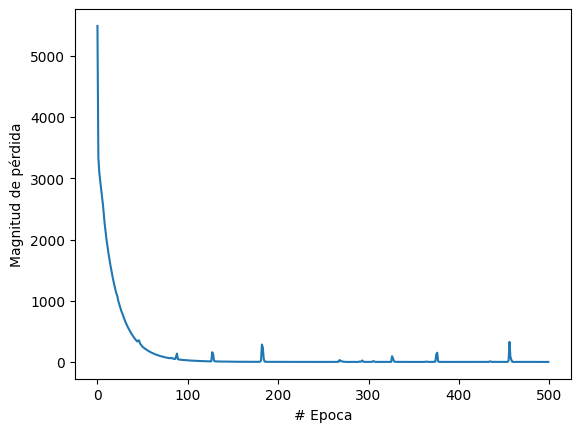

In [11]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(history.history["loss"])

#### Mostramos las variables internas del modelo

In [12]:
print("Variables internas del modelo")
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[-0.16799262,  0.37973303,  0.00804727]], dtype=float32), array([-1.8424201, 36.966587 , -1.6980065], dtype=float32)]
[array([[-0.017527  , -0.29400873, -0.30778813],
       [ 2.7133355 , -0.69071627, -0.6934931 ],
       [ 0.00388925, -0.8476646 , -0.92967296]], dtype=float32), array([0.4466243, 0.       , 0.       ], dtype=float32)]
[array([[ 1.7429403],
       [-0.6375655],
       [ 0.5638703]], dtype=float32), array([-143.47643], dtype=float32)]


## Paso 6: Evaluación el modelo

In [13]:
scores = model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1509 - mse: 0.1509 


## Paso 7: Generación de predicciones
Hacemos una predicción, en este caso de un único valor de 24 grados celsius. Como se puede comprobar el valor resultante es de 75,10 grados farenheit. El modelo es correcto, ya que el valor real sería de 75,2.

In [14]:
entrada = np.array([[24]])  # Convertir en un array 2D
resultado = model.predict(entrada)

print("El resultado es " + str(resultado[0][0]) + " Fahrenheit")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
El resultado es 75.22356 Fahrenheit
